In [66]:
import pandas as pd

In [67]:
data = pd.read_csv('Train.csv')

In [79]:
data['Destination'].str.split("|").str[0]

0         New Delhi
1          Srinagar
2           Udaipur
3            Munnar
4           Pattaya
            ...    
20995        Shimla
20996      Srinagar
20997       Colombo
20998    Darjeeling
20999        Munnar
Name: Destination, Length: 21000, dtype: object

In [81]:
data['Start_Destination'] = data['Destination'].str.split("|").str[0]

In [82]:
data['Destination']

0                 New Delhi|Shimla|Manali|Chandigarh
1                         Srinagar|Pahalgam|Srinagar
2                                Udaipur|Chittorgarh
3        Munnar|Kumarakom|Allepey|Kovalam and Poovar
4                                    Pattaya|Bangkok
                            ...                     
20995                        Shimla|Manali|New Delhi
20996             Srinagar|Gulmarg|Pahalgam|Srinagar
20997                                        Colombo
20998                     Darjeeling|Pelling|Gangtok
20999                         Munnar|Kovalam|Allepey
Name: Destination, Length: 21000, dtype: object

In [84]:
data['Start_Destination']

0         New Delhi
1          Srinagar
2           Udaipur
3            Munnar
4           Pattaya
            ...    
20995        Shimla
20996      Srinagar
20997       Colombo
20998    Darjeeling
20999        Munnar
Name: Start_Destination, Length: 21000, dtype: object

In [88]:
data['Start City']

0           Mumbai
1        New Delhi
2        New Delhi
3        New Delhi
4        New Delhi
           ...    
20995       Mumbai
20996    New Delhi
20997    New Delhi
20998    New Delhi
20999    New Delhi
Name: Start City, Length: 21000, dtype: object

In [5]:
data = data.fillna(0)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [8]:
data['Travel Year'] = le.fit_transform(data['Travel Year'])

data['Travel Month'] = le.fit_transform(data['Travel Month'])

data['Week_filter'] = le.fit_transform(data['Week_filter'])

data['Cancellation Rules'] = le.fit_transform(data['Cancellation Rules'])

data['Package Type'] = le.fit_transform(data['Package Type'])

In [4]:
dummies = pd.get_dummies(data['Travel Year']).rename(columns=lambda x: 'Category_' + str(x))
# df = pd.concat([df, dummies], axis=1)
# df = df.drop(['Category'], inplace=True, axis=1)

In [5]:

data = pd.concat([data, dummies], axis=1)


In [6]:
del data['Travel Year']

In [7]:
data.shape

(21000, 1202)

In [8]:
dummies1 = pd.get_dummies(data['Travel Month']).rename(columns=lambda x: 'Category_' + str(x))
dummies1.shape


(21000, 12)

In [9]:
data = pd.concat([data, dummies1], axis=1)
data.shape

(21000, 1214)

In [10]:
del data['Travel Month']

In [11]:


dummies2 = pd.get_dummies(data['Week_filter']).rename(columns=lambda x: 'Category_' + str(x))
dummies2.shape

(21000, 4)

In [12]:
data = pd.concat([data, dummies2], axis=1)
data.shape

(21000, 1217)

In [13]:
del data['Week_filter']

In [14]:
dummies3 = pd.get_dummies(data['Cancellation Rules']).rename(columns=lambda x: 'Category_' + str(x))
dummies3.shape

(21000, 10)

In [15]:
data = pd.concat([data, dummies3], axis=1)
data.shape

(21000, 1226)

In [16]:
# data = pd.concat([data, dummies3], axis=1)
# data.shape

In [17]:
data.shape

(21000, 1226)

In [18]:
del data['Cancellation Rules']

In [19]:


dummies4 = pd.get_dummies(data['Package Type']).rename(columns=lambda x: 'Category_' + str(x))
dummies4.shape

(21000, 5)

In [20]:
data = pd.concat([data, dummies4], axis=1)
data.shape

(21000, 1230)

In [9]:
del data['Package Type']

In [10]:
del data['Uniq Id']

In [23]:
data.to_csv('clean_data.csv')

In [11]:
# Target variable
y = data['Per Person Price'].values

In [12]:
y

array([11509. , 22485.5, 12421.5, ..., 29964. , 28145.5, 15736. ])

In [13]:
#Input variable
X = data

In [14]:
X.head()

,Flight Stops,Meals,Cancellation Rules,Per Person Price,not available,dal lake,avantipura ruins,mughal gardens,cheshma shahi,nishat bagh,...,turkish airlines,brussels airlines,cathay pacific,air austral,south african airways,ethiopian airlines,sichuan airlines,Travel Year,Travel Month,Week_filter
0,2,3,5,11509.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5,3
1,0,5,0,22485.5,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0
2,0,4,0,12421.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3
3,0,5,0,35967.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,3
4,0,5,0,25584.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,1


In [15]:
#Removing target variable

del X['Per Person Price']

In [16]:
X.shape

(21000, 1198)

In [17]:
X=X.fillna(0)

In [19]:
from sklearn.decomposition import PCA
# Apply PCA for dimension reduction
pca = PCA(n_components=500).fit(X)
X_pca = pca.transform(X)
print(sum(pca.explained_variance_ratio_)) 

0.9964216662196467


In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_test 

array([ 9663. , 18215.5, 24342. , ..., 42694. , 36052. , 12199.5])

In [38]:
y_pred = regressor.predict(X_test)

In [39]:
y_pred

array([ 9135.31187367, 20702.92613148, 27254.57652211, ...,
       26604.40310754, 32274.41353194, 17644.1045358 ])

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

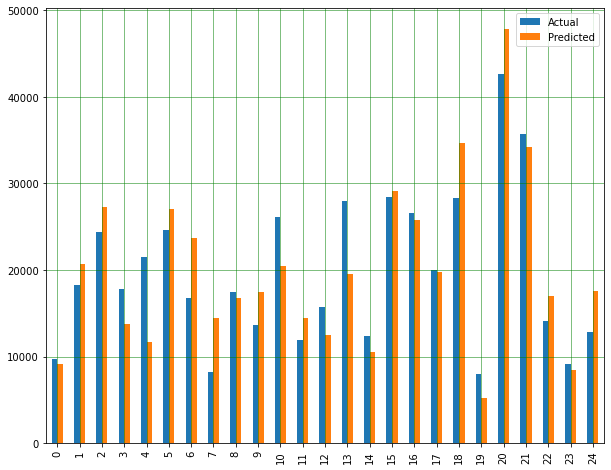

In [41]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 653548207.6121726
Mean Squared Error: 1.000395720055706e+21
Root Mean Squared Error: 31629032866.271866


In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [44]:
print(rfr.predict(X_test))

[ 8508.92866667 16854.45       24722.87       ... 29734.91666667
 32301.53       14875.55      ]


In [45]:
y_pred = rfr.predict(X_test)

In [46]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3794.8305777885435
Mean Squared Error: 43306705.86907722
Root Mean Squared Error: 6580.783074154414


In [47]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [48]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Imputer
from sklearn.model_selection import cross_val_score, cross_val_predict
import os

gbm = lgb.LGBMRegressor(**hyper_params)

In [120]:
!pip install lightgbm

In [50]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [51]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LightGBMError: Feature (dolphinsnose) appears more than one time.

In [62]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [63]:
y_pred

array([19907.71093824, 19956.56145316, 19990.3282919 , ...,
       20010.18406844, 20036.58410184, 19959.07335354])

In [65]:
# Basic RMSE
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_test) ** 0.5, 5))

The rmse of prediction is: 0.55513


In [66]:
X = X.loc[:,~X.columns.duplicated()]

In [51]:
import re
x_test1 = x_test1.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [54]:
x_test1 = x_test1.loc[:,~x_test1.columns.duplicated()]

In [38]:
x_test1 = pd.read_csv('dummy_creation_ss_test.csv')

In [39]:
x_test1.shape

(9000, 1155)

In [40]:
dummies = pd.get_dummies(x_test1['Travel Year']).rename(columns=lambda x: 'Category_' + str(x))





In [41]:
dummies.shape

(9000, 2)

In [42]:
x_test1 = pd.concat([x_test1, dummies], axis=1)



In [43]:
x_test1.shape

(9000, 1157)

In [44]:
del x_test1['Travel Year']

In [45]:
dummies1 = pd.get_dummies(x_test1 ['Travel Month']).rename(columns=lambda x: 'Category_' + str(x))
dummies1.shape

x_test1  = pd.concat([x_test1 , dummies1], axis=1)
x_test1 .shape

del x_test1 ['Travel Month']

In [46]:
dummies2 = pd.get_dummies(x_test1 ['Week_filter']).rename(columns=lambda x: 'Category_' + str(x))
dummies2.shape

x_test1  = pd.concat([x_test1 , dummies2], axis=1)
x_test1 .shape


del x_test1 ['Week_filter']

In [47]:
dummies3 = pd.get_dummies(x_test1 ['Cancellation Rules']).rename(columns=lambda x: 'Category_' + str(x))
dummies3.shape

(9000, 7)

In [48]:
x_test1  = pd.concat([x_test1 , dummies3], axis=1)

del x_test1 ['Cancellation Rules']

In [49]:
dummies4 = pd.get_dummies(x_test1 ['Package Type']).rename(columns=lambda x: 'Category_' + str(x))
dummies4.shape

(9000, 5)

In [50]:
x_test1  = pd.concat([x_test1 , dummies4], axis=1)

del x_test1 ['Package Type']

In [ ]:
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [55]:
for column in x_test1.columns:
    if column not in X.columns:
        x_test1.drop([column], axis=1, inplace=True)

C:\Users\Sumit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
X.shape

(21000, 1220)

In [57]:
x_test1.shape

(9000, 1170)

In [58]:
for column in  X.columns:
    if column not in x_test1.columns:
        x_test1[column] = 0

<ipython-input-58-1a9eceba4a3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test1[column] = 0


In [59]:
x_test1=x_test1.fillna(0)

In [60]:
x_test1.shape

(9000, 1220)

In [61]:
X.shape

(21000, 1220)

In [95]:
#X_pca_test = pca.transform(x_test1)

In [67]:
#y_pred = rfr.predict(x_test1)
y_pred = gbm.predict(x_test1, num_iteration=gbm.best_iteration_)

In [68]:
submission = pd.DataFrame()

In [69]:
submission['Per Person Price'] = y_pred 

In [70]:
submission.shape

(9000, 1)

In [71]:
submission.to_csv('submisison6.csv')

In [116]:
submission = pd.DataFrame()
submission['Per Person Price'] = y_pred 
submission.to_csv('submisison5.csv')

In [76]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

In [77]:

#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [78]:
#!pip install xgboost

In [79]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [80]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4,
                                   min_samples_leaf=15, min_samples_split=15, 
                                   loss='huber', random_state =5)

In [82]:
GBoost.fit(X_train, y_train)
gb_train_pred = GBoost.predict(X_train)

In [83]:
gb_pred = (GBoost.predict(X_test.values))

In [84]:
print(rmsle(y_train, gb_train_pred))

5699.720557833189


In [85]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.52, gamma=0.03, 
                             learning_rate=0.072, max_depth=6, 
                             min_child_weight=2, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.615, silent=1,
                             random_state =7, nthread = -1)

In [86]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = model_xgb.predict(X_test)
print(rmsle(y_train, xgb_train_pred))

[20:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


3701.380053640707


In [87]:
price_XG_pred = pd.DataFrame(xgb_pred)

In [88]:

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35,
                              learning_rate=0.052, n_estimators=2800,feature_fraction = 0.75,
                              feature_fraction_seed=9,min_data_in_leaf =15
                                                         
                              )

In [90]:

model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)

In [91]:
print(rmsle(y_train, lgb_train_pred))

3683.2447127659266


In [92]:
lgb_pred = model_lgb.predict(X_test.values)

In [93]:
ens_train =  xgb_train_pred*0.35 + lgb_train_pred*0.35 + gb_train_pred*0.3

In [94]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,xgb_train_pred*0.45 + lgb_train_pred*0.3 + gb_train_pred*0.25 ))

RMSLE score on train data:
3959.568314360867


In [34]:
import numpy as np 
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

import os

In [35]:
import math

In [36]:
# Linear Regression (Normal Equations)
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)
print("Linear Regression (Normal Equations) Train RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = lin_reg.predict(X_test)
print("Linear Regression (Normal Equations) Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression (Normal Equations) Train RMSE:  6087.553340406281
Linear Regression (Normal Equations) Test RMSE:  5068393569439.296


In [37]:
# Feature scaling numerical data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Stochastic Gradient Descent Regression
# Using GridSearchCV to find out the best hyperparameters

parameters = {'eta0': [0.03, 0.01, 0.003, 0.001, 0.0003],
             'penalty': ['l1', 'l2', 'elasticnet'],
             'alpha': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003]}
sgd_reg = SGDRegressor(random_state=42)

clf = GridSearchCV(sgd_reg, parameters)
clf.fit(X_train, y_train.ravel())

GridSearchCV(estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001,
                                   0.0003],
                         'eta0': [0.03, 0.01, 0.003, 0.001, 0.0003],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [39]:
y_pred = clf.predict(X_train)
print("SGD Regression Train RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = clf.predict(X_test)
print("SGD Regression Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
parameters = clf.get_params()
print('Best Learning Rate: ', parameters['estimator__eta0'])
print('Best Penalty: ', parameters['estimator__penalty'])
print('Best Regularization Coefficient: ', parameters['estimator__alpha'])

SGD Regression Train RMSE:  6201.8400827637615
SGD Regression Test RMSE:  7077.361272053416
Best Learning Rate:  0.01
Best Penalty:  l2
Best Regularization Coefficient:  0.0001


In [66]:
# Support Vector Regression

svr = SVR(kernel='linear')
svr.fit(X_train, y_train.ravel())

y_pred = svr.predict(X_train)
print("Support Vector Regression, Linear Kernel Train RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = svr.predict(X_test)
print("Support Vector Regression, Linear Kernel Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

Support Vector Regression, Linear Kernel Train RMSE:  7142.1310401765
Support Vector Regression, Linear Kernel Test RMSE:  7804.351427671343


In [41]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train.ravel())

y_pred = svr.predict(X_train)
print("Support Vector Regression, RBF Kernel Train RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = svr.predict(X_test)
print("Support Vector Regression, RBF Kernel Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

Support Vector Regression, RBF Kernel Train RMSE:  11638.601315875978
Support Vector Regression, RBF Kernel Test RMSE:  12503.457925353508


In [64]:
y_pred = svr.predict(x_test1)

In [42]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train.ravel())

y_pred = svr.predict(X_train)
print("Support Vector Regression, Polynomial Kernel Train RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = svr.predict(X_test)
print("Support Vector Regression, Polynomial Kernel Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

Support Vector Regression, Polynomial Kernel Train RMSE:  11500.601253231787


KeyboardInterrupt: 

In [43]:
y_pred = svr.predict(X_test)
print("Support Vector Regression, Polynomial Kernel Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

KeyboardInterrupt: 

In [ ]:
# Support Vector Regression
# Using GridSearchCV to find out the best hyperparameters

parameters = {'C': [1, 3, 10, 30, 100, 300],
             'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}

svr = SVR(kernel='rbf')

clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train.ravel())

In [ ]:
y_pred = clf.predict(X_train)
print("Support Vector Regression Train RMSE: ", math.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = clf.predict(X_test)
print("Support Vector Regression Test RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
parameters = clf.get_params()
print('Best Regularization Coefficient: ', parameters['estimator__C'])
print('Best Gamma: ', parameters['estimator__gamma'])

In [52]:
import requests
import urllib.parse

In [64]:
import requests
import urllib.parse

address = 'Chennai'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

13.0836939
80.270186


In [129]:
import time
def get_lat_long(Location):
    start = time.time()
    
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(Location) +'?format=json'
    response = requests.get(url).json()
    x = (response[0]["lat"])
    y = (response[0]["lon"])
    
    elapsed_time_lc=(time.time()-start)
    
    print(elapsed_time_lc)
    
#     print(x)
#     print(y)
    
    return x,y
    
    
    

In [136]:
x, y= get_lat_long(Location="Chikmagalur")

0.5058658123016357


In [105]:
data = data.head(20)

In [106]:
print(x)
print(y)

28.6517178
77.2219388


In [102]:
data

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Star_Destination,Start_Destination,Start_City_Lon_Lat
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,New Delhi,New Delhi,"(13.0836939, 80.270186)"
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,New Delhi,Srinagar,"(13.0836939, 80.270186)"
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,New Delhi,Udaipur,"(13.0836939, 80.270186)"
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,New Delhi,Munnar,"(13.0836939, 80.270186)"
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,New Delhi,Pattaya,"(13.0836939, 80.270186)"
5,3bb074528941b3a6823371f77b07fb0f,Cochin Trip with Visit to Guruvayoor Temple,Deluxe,Cochin,2N Cochin,Cochin,30-09-2021,Not Available,Mumbai,IndiGo,1,3,Dutch Palace | Jewish Synagogue | St. Francis...,Not Available,8512.0,New Delhi,Cochin,"(13.0836939, 80.270186)"
6,644c71b1a9ccfe6eacc6303be12c1352,Jaipur Holiday,Standard,Jaipur,3N Jaipur,Jaipur,24-01-2021,Ratnawali A Vegetarian Heritage Hotel:4.1,New Delhi,IndiGo,2,3,Hawa Mahal | City Palace | Jantar Mantar | Am...,Cancellation any time after making the 1st pay...,6848.0,New Delhi,Jaipur,"(13.0836939, 80.270186)"
7,07943295cfdce5cb20861e8369948b1d,Kasol & Manali holiday from Delhi,Deluxe,Kasol|Manali,2N Kasol . 3N Manali,Kasol|Manali,10-12-2021,The Himalayan Village:Four|The Holiday Resorts...,Mumbai,Not Available,1,3,Pandoh Dam | Hadimba Temple | Tibetan Monaste...,Cancellation any time after making the 1st pay...,14454.5,New Delhi,Kasol,"(13.0836939, 80.270186)"
8,126e12c63233bf11ef2e001a062f2a53,Charismatic Kashmir with Gulmarg,Deluxe,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 2N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,03-10-2021,California Group of Houseboats:3.6|The Rosewoo...,New Delhi,IndiGo,1,3,Dal Lake | Gondola Point | Avantipura Ruins |...,Cancellation any time after making the 1st pay...,21556.5,New Delhi,Srinagar,"(13.0836939, 80.270186)"
9,72aeb7bac6d5600fe443fca06e3db631,Luxury Getaway to Udaipur - Stay at the Chunda...,Premium,Udaipur,2N Udaipur,Udaipur,15-08-2021,Chunda Palace:4.6,Mumbai,IndiGo,0,5,Lake Pichola | Jag Mandir Palace | Sajjangarh...,This cancellation policy is applicable for boo...,13042.0,New Delhi,Udaipur,"(13.0836939, 80.270186)"


In [131]:
data['Start_City_Lon_Lat'] = data['Start City'].apply(lambda x : get_lat_long(x))

0.6820244789123535
1.0040085315704346
1.0082674026489258
0.9843957424163818
0.9953887462615967
1.0448923110961914
0.9745492935180664
1.005671501159668
0.9815118312835693
1.0199689865112305
0.9728908538818359
1.0542068481445312
0.9747357368469238
1.0046942234039307
0.9960217475891113
0.9916577339172363
0.9464566707611084
1.0435338020324707
1.058661937713623
0.976656436920166


In [108]:
data['Start_City_Lon_Lat']

0     (19.0759899, 72.8773928)
1     (28.6138954, 77.2090057)
2     (28.6138954, 77.2090057)
3     (28.6138954, 77.2090057)
4     (28.6138954, 77.2090057)
5     (19.0759899, 72.8773928)
6     (28.6138954, 77.2090057)
7     (19.0759899, 72.8773928)
8     (28.6138954, 77.2090057)
9     (19.0759899, 72.8773928)
10    (28.6138954, 77.2090057)
11    (28.6138954, 77.2090057)
12    (28.6138954, 77.2090057)
13    (28.6138954, 77.2090057)
14    (19.0759899, 72.8773928)
15    (28.6138954, 77.2090057)
16    (28.6138954, 77.2090057)
17    (19.0759899, 72.8773928)
18    (19.0759899, 72.8773928)
19    (19.0759899, 72.8773928)
Name: Start_City_Lon_Lat, dtype: object

In [109]:
data['Start_Destination_lat_long'] = data['Start_Destination'].apply(lambda x : get_lat_long(x))

In [118]:
data['Combined_Location']= data['Start_Destination_lat_long']+data['Start_City_Lon_Lat']

In [140]:
data['Combined_Location']

dtype('O')

In [138]:
address = 'Chikmagalur'
url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

response = requests.get(url).json()
print(response[0]["lat"])
print(response[0]["lon"])

13.318014
75.7738743


In [112]:
def get_km(l1, lo1, l2, lo2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(l1)
    lon1 = radians(lo1)
    lat2 = radians(l2)
    lon2 = radians(lo2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c+280

    print("Result:", distance)
    return distance
    

In [113]:
dis =   get_km(19.0759899,72.8773928, 28.6138954, 77.2090057)

Result: 1428.4680278033059


In [65]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(13.0836939)
lon1 = radians(80.270186)
lat2 = radians(19.0759899)
lon2 = radians(72.8773928)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c+280

print("Result:", distance)
#print("Should be:", 278.546, "km")

Result: 1313.3325283060963


In [120]:
data['Combined_Location_km']= data['Combined_Location'].apply(lambda x: get_km(float(x[0]),float(x[1]),float(x[2]),float(x[3])) )

Result: 1428.4680278033059
Result: 928.3422226406879
Result: 849.3099493463912
Result: 2340.802489727041
Result: 3287.98122579598
Result: 1360.5198392159234
Result: 513.247209753886
Result: 1785.6174262378154
Result: 928.3422226406879
Result: 897.7334843922023
Result: 2537.4120310041567
Result: 2360.376267210758
Result: 1740.649921024263
Result: 849.3099493463912
Result: 1634.7761079126335
Result: 504.82031874216676
Result: 2320.268086179347
Result: 1959.3572484982312
Result: 1685.6529667714124
Result: 1225.9440605699688


In [122]:
data

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,...,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Star_Destination,Start_Destination,Start_City_Lon_Lat,Start_Destination_lat_long,Combined_Location,Combined_Location_km
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,...,3,Not Available,Not Available,11509.0,New Delhi,New Delhi,"(19.0759899, 72.8773928)","(28.6138954, 77.2090057)","(28.6138954, 77.2090057, 19.0759899, 72.8773928)",1428.468028
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,...,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,New Delhi,Srinagar,"(28.6138954, 77.2090057)","(34.0747444, 74.8204443)","(34.0747444, 74.8204443, 28.6138954, 77.2090057)",928.342223
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,...,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,New Delhi,Udaipur,"(28.6138954, 77.2090057)","(24.578721, 73.6862571)","(24.578721, 73.6862571, 28.6138954, 77.2090057)",849.309949
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,...,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,New Delhi,Munnar,"(28.6138954, 77.2090057)","(10.0869959, 77.0600915)","(10.0869959, 77.0600915, 28.6138954, 77.2090057)",2340.802490
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,...,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,New Delhi,Pattaya,"(28.6138954, 77.2090057)","(12.931941, 100.9009534)","(12.931941, 100.9009534, 28.6138954, 77.2090057)",3287.981226
5,3bb074528941b3a6823371f77b07fb0f,Cochin Trip with Visit to Guruvayoor Temple,Deluxe,Cochin,2N Cochin,Cochin,30-09-2021,Not Available,Mumbai,IndiGo,...,3,Dutch Palace | Jewish Synagogue | St. Francis...,Not Available,8512.0,New Delhi,Cochin,"(19.0759899, 72.8773928)","(9.9313695, 76.2673759)","(9.9313695, 76.2673759, 19.0759899, 72.8773928)",1360.519839
6,644c71b1a9ccfe6eacc6303be12c1352,Jaipur Holiday,Standard,Jaipur,3N Jaipur,Jaipur,24-01-2021,Ratnawali A Vegetarian Heritage Hotel:4.1,New Delhi,IndiGo,...,3,Hawa Mahal | City Palace | Jantar Mantar | Am...,Cancellation any time after making the 1st pay...,6848.0,New Delhi,Jaipur,"(28.6138954, 77.2090057)","(26.9154576, 75.8189817)","(26.9154576, 75.8189817, 28.6138954, 77.2090057)",513.247210
7,07943295cfdce5cb20861e8369948b1d,Kasol & Manali holiday from Delhi,Deluxe,Kasol|Manali,2N Kasol . 3N Manali,Kasol|Manali,10-12-2021,The Himalayan Village:Four|The Holiday Resorts...,Mumbai,Not Available,...,3,Pandoh Dam | Hadimba Temple | Tibetan Monaste...,Cancellation any time after making the 1st pay...,14454.5,New Delhi,Kasol,"(19.0759899, 72.8773928)","(32.0104317, 77.3166036)","(32.0104317, 77.3166036, 19.0759899, 72.8773928)",1785.617426
8,126e12c63233bf11ef2e001a062f2a53,Charismatic Kashmir with Gulmarg,Deluxe,Srinag

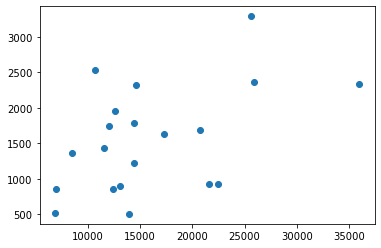

In [123]:
plt.scatter(data["Per Person Price"], data["Combined_Location_km"])